## Census Income Project

### Data Description

- The dataset provided to us contains 32560 rows, and 14 different independent features. We have to predict if a person earns more than 50k$ per year or not. Since the data predicts 2 values (>50K or <=50K), this clearly is a classification problem, and we will train the classification models to predict the desired outputs.

### Objective

The prediction task is to determine whether a person makes over $50K a year.

### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Importing the Dataset

In [ ]:
df=pd.read_csv('census_income.csv')

In [ ]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [ ]:
df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [ ]:
df.shape

(32560, 15)

In [ ]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

###### Description of the columns

1. Age — The age of an individual
2. Workclass — The class of work to which an individual belongs.
3. Fnlwgt — The weight assigned to the combination of features (an estimate of how many people belong to this set of combination)
4. Education — Highest level of education
5. Education_num — Number of years for which education was taken
6. Marital_Status — Represents the category assigned on the basis of marriage status of a person
7. Occupation — Profession of a person
8. Relationship — Relation of the person in his family
9. Race — Origin background of a person
10. Sex — Gender of a person
11. Capital_gain — Capital gained by a person
12. Capital_loss — Loss of capital for a person
13. Hours_per_week — Number of hours for which an individual works per week
14. Native_Country — Country to which a person belongs

Output:

1. Income — The target variable, which predicts if the income is higher or lower than 50K$.

## Exploratory Data Analysis

In [ ]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


- We see that we have 6 numerical(int64 type) columns and 9 categorical columns(object type).

#### Checking for duplicates

In [ ]:
duplicate=df[df.duplicated()]
print('Duplicate Rows:')
duplicate

Duplicate Rows:


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
4880,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5103,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9170,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11630,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13083,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15058,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17039,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18554,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18697,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21317,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [ ]:
df.duplicated().sum()

24

- There are 24 duplicate rows. Let's drop them

In [ ]:
df=df.drop_duplicates()
df.shape

(32536, 15)

In [ ]:
df.sample(15)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
28789,46,Self-emp-inc,120902,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,3103,0,37,United-States,>50K
6616,43,Private,183096,Some-college,10,Separated,Sales,Unmarried,White,Female,0,0,10,United-States,<=50K
26283,37,Private,329026,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,>50K
6949,38,Private,107630,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
1087,42,Private,150533,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,7298,0,52,United-States,>50K
14502,36,State-gov,147258,Some-college,10,Divorced,Transport-moving,Not-in-family,White,Male,0,0,60,United-States,<=50K
4496,46,Private,111979,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,47,United-States,<=50K
25510,30,Private,251411,Some-college,10,Divorced,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
16963,45,Local-gov,209482,Masters,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,45,United-States,>50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [ ]:
# we can see there are ? present in the dataset instead of Nan, checking for that:

df.isin([' ?']).sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     582
Income               0
dtype: int64

- We find that there are columns in which some of the data is '?'. Let's replace them with NaN(null value)

In [ ]:
df = df.replace(' ?' , np.NaN)

#### Checking for null values

In [ ]:
df.isna().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     582
Income               0
dtype: int64

- There is null data in the dataset. Let's treat them

In [ ]:
df['Workclass'].value_counts()

 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [ ]:
#Filling workclass column with frequently repeated value i.e., using mode as it's a categorical column

df['Workclass']=df['Workclass'].fillna(df['Workclass'].mode()[0])

In [ ]:
df["Race"]=df['Race'].fillna(df['Race'].mode()[0])

In [ ]:
df['Sex']=df['Sex'].fillna(df['Sex'].mode()[0])

In [ ]:
df['Capital_gain']=df['Capital_gain'].fillna(df['Capital_gain'].mean())

In [ ]:
df['Capital_loss']=df['Capital_loss'].fillna(df['Capital_loss'].mean())

In [ ]:
df['Income']=df['Income'].fillna(df['Income'].mode()[0])

In [ ]:
df['Occupation'].value_counts()

 Prof-specialty       4136
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3767
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: Occupation, dtype: int64

In [ ]:
# Filling occupation column with frequently repeated value i.e., using mode as it's a categorical column

df['Occupation']=df['Occupation'].fillna(df['Occupation'].mode()[0])

In [ ]:
df['Native_country'].value_counts()

 United-States                 29152
 Mexico                          639
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Japan                            62
 Guatemala                        62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

In [ ]:
# Filling Native country column with frequently repeated value i.e., using mode as it's a categorical column

df['Native_country']=df['Native_country'].fillna(df['Native_country'].mode()[0])

In [ ]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

- We find that the null values are treated and hence there is no null data in the dataset.

In [ ]:
#Checking numerical status of the dataset

df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,1078.410069,87.370912,40.440343
std,13.638193,1.055563e+05,2.571622,7388.068465,403.107737,12.347079
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


- The minimum age is 17 and maximum age is 90(i.e., person's age is in the range of 17 to 90)
- The fnlwgt column has a minimum value of 12285 and maximum value of 1484705
- The education number has a range of 1 to 16
- The capital gain starts from 0 and ends at 99999
- The capital loss starts at 0 and ends at 4356
- Hours per week range between 1–99.

- There are outliers expected in Capital gain column as the values till 75% are 0. Same is the case with capital loss as well.
- The age column has a bit difference between 75% value and the max value. So, there may be a chance of getting outliers here.
- The fnlwgt column also has a huge difference between 75% values and the max value. There is a chance of getting outliers here.

##### Separate Categorical and numerical columns

In [ ]:
cat_fea=[col for col in df.columns if df[col].dtype==object]
num_fea=[col for col in df.columns if df[col].dtype!=object]

In [ ]:
cat_fea

['Workclass',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country',
 'Income']

In [ ]:
num_fea

['Age',
 'Fnlwgt',
 'Education_num',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week']

### Univariate Analysis

In [ ]:
df['Income'].value_counts()

 <=50K    24697
 >50K      7839
Name: Income, dtype: int64

- The income column is our target variable with 2 values — <=50K and >50K.
- The count of these values is 24697 and 7839 respectively, suggesting that people with income higher than 50K are significantly less, and our data set is imbalanced considering the target variable.

In [ ]:
#converting Income column to numerical values

df['Income']=df['Income'].replace([' <=50K',' >50K'],[0,1])

In [ ]:
df['Income'].value_counts()

0    24697
1     7839
Name: Income, dtype: int64

In [ ]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0


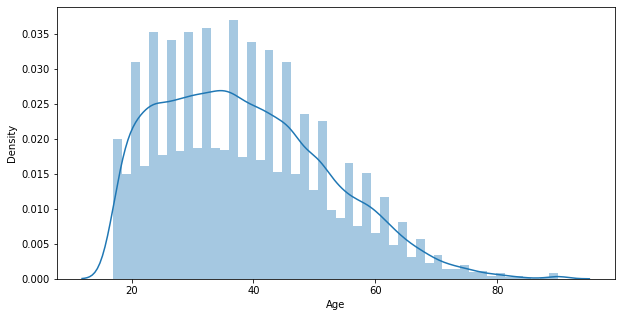

In [ ]:
#Let's analyze the age from distribution plot

fig, ax = plt.subplots(figsize=(10, 5))
sns.distplot(a=df.Age, kde=True)

- The majority of the ages are falling in between 20 and 50
- We also observe that the data is bit right skewed
- When age increases, the count keeps decreasing

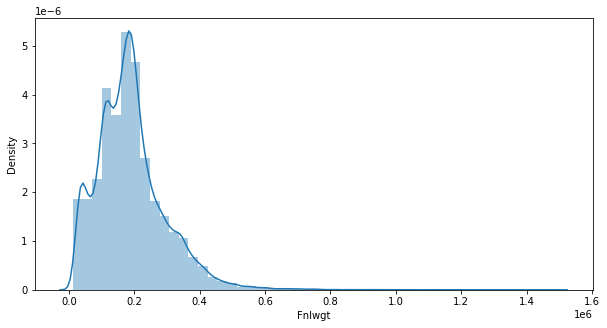

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.distplot(a=df.Fnlwgt, kde=True)

- 'Fnlwgt' has mixture of gaussians and distribution is slightly positively skewed

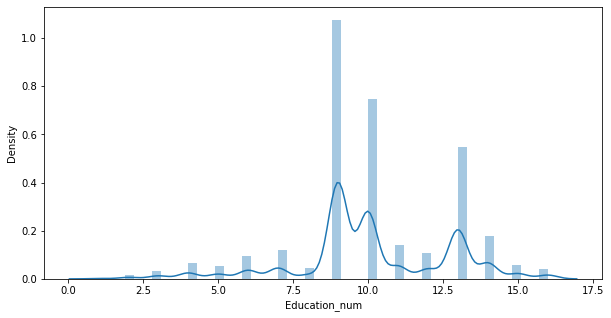

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.distplot(a=df.Education_num, kde=True)

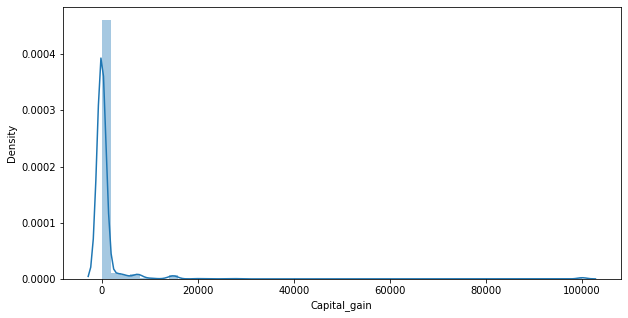

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.distplot(a=df.Capital_gain, kde=True)

- 'Capital gain' is heavily right skewed

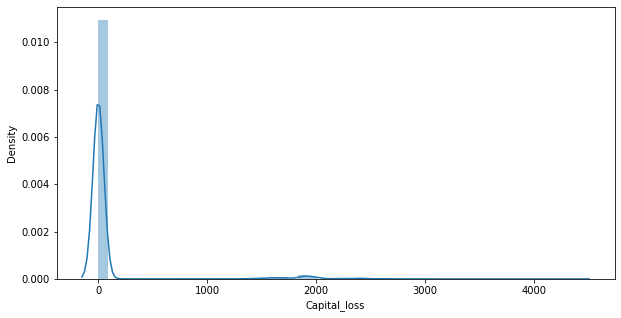

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.distplot(a=df.Capital_loss, kde=True)

- 'Capital loss' is also heavily right skewed

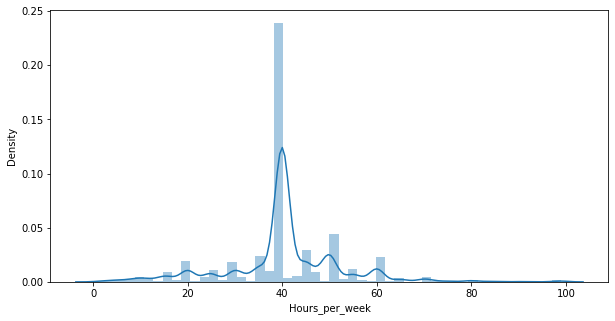

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.distplot(a=df.Hours_per_week, kde=True)

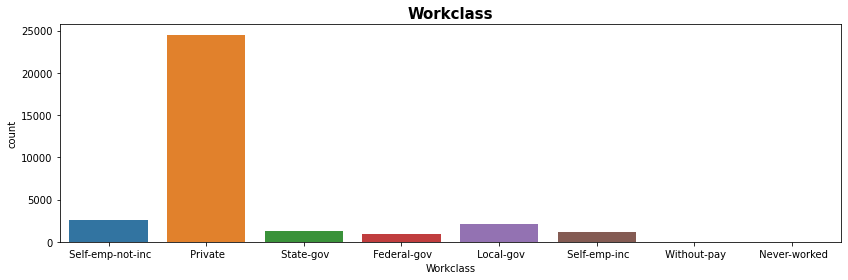

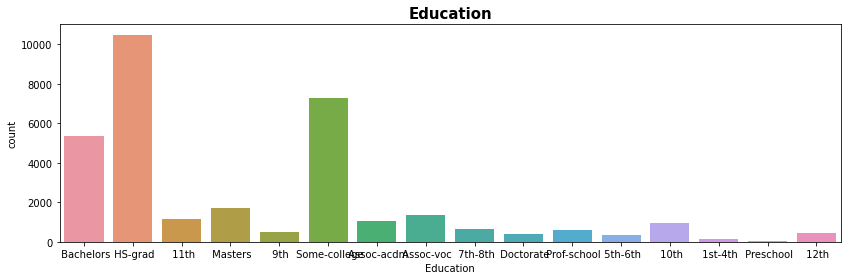

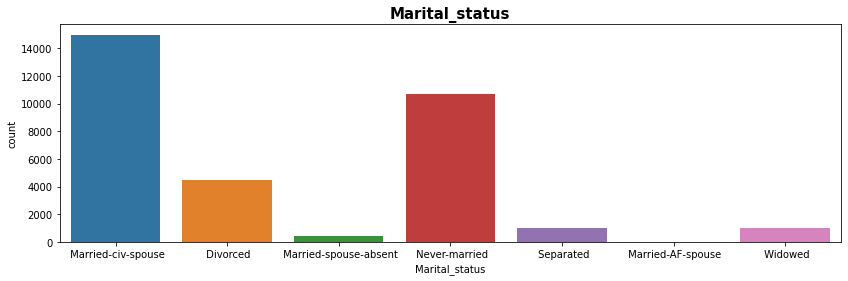

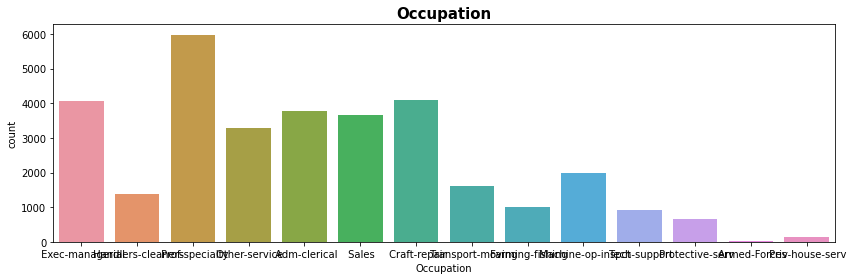

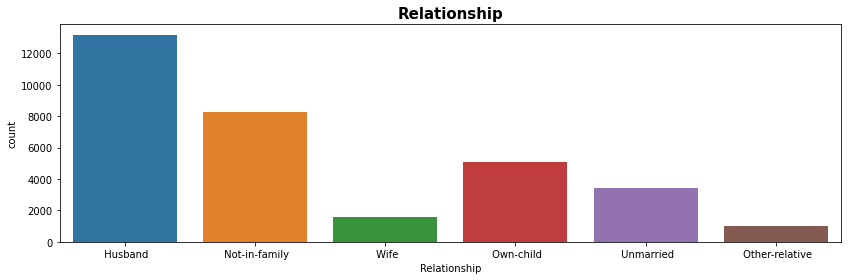

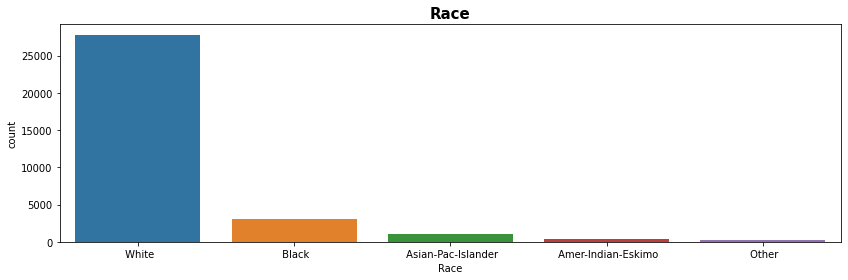

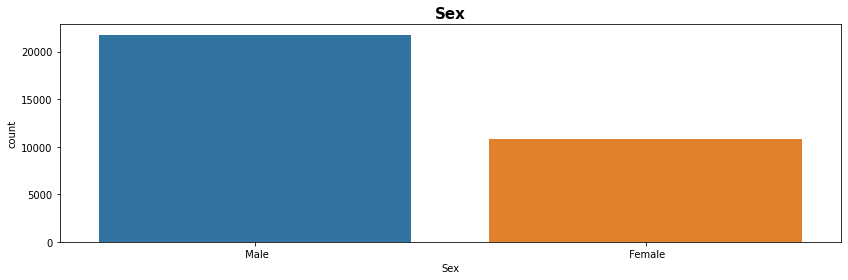

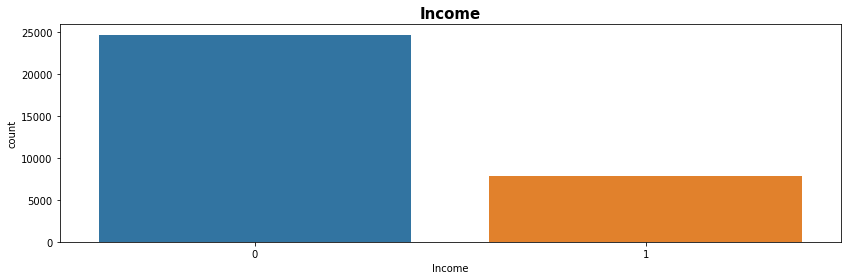

In [ ]:
for fea in [feature for feature in cat_fea if feature not in ['Native_country']]:
    plt.figure(figsize=(14,4))
    plt.subplot(111)
    sns.countplot(data=df,x=fea)
    plt.title(fea,fontsize=15,weight='bold')
    plt.show()

- We find that most of the people are doing private jobs
- People with Local-gov job are more than the State-gov job
- Most of the people have 'MS-grad' as their highest education
- Married people are working and the second highest people are never married people
- People with occupation as 'Armed-Forces' are the least
- People who are married are the highest and the second highest are the people who never married
- White race people are the most followed by Black
- Male are more in number than female

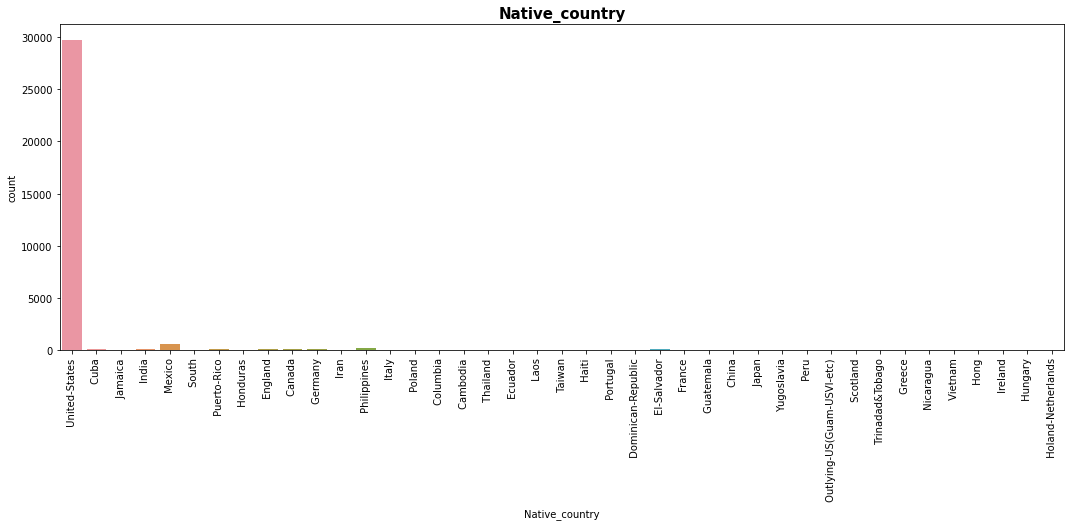

In [ ]:
plt.figure(figsize=(18,6))
sns.countplot(df['Native_country'])
plt.title('Native_country',fontsize=15,weight='bold')
plt.xticks(rotation=90)
plt.show()

- We find that almost all the people native country is 'United-States' 

### Bivariate Analysis

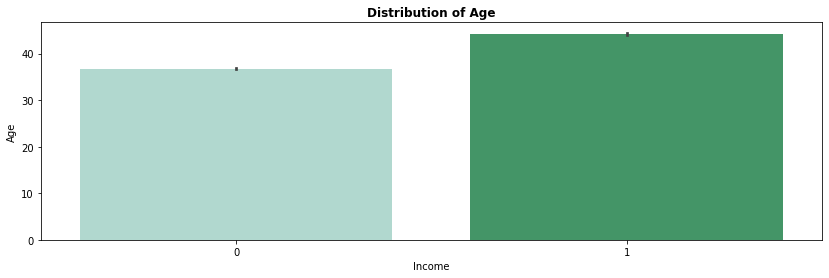

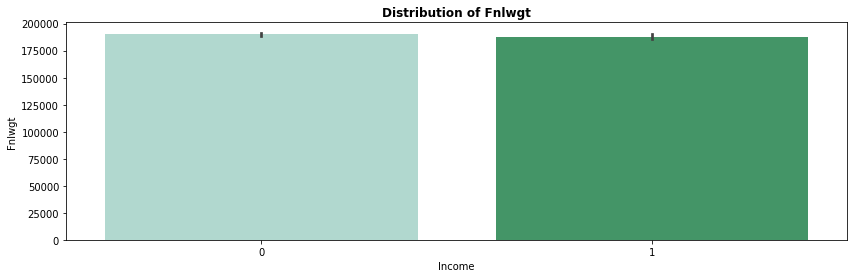

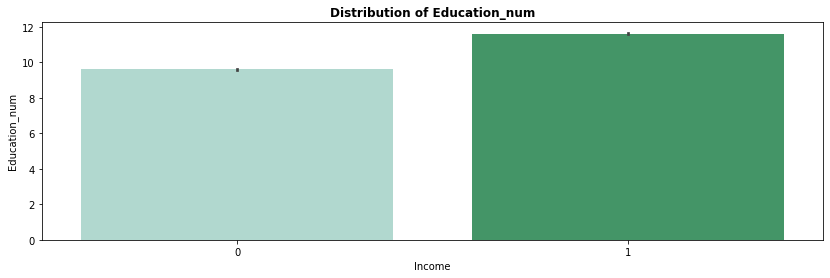

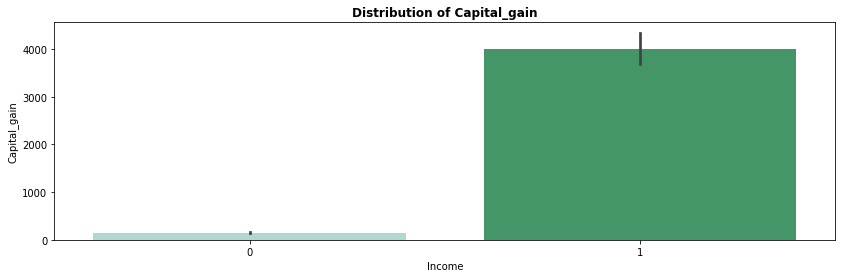

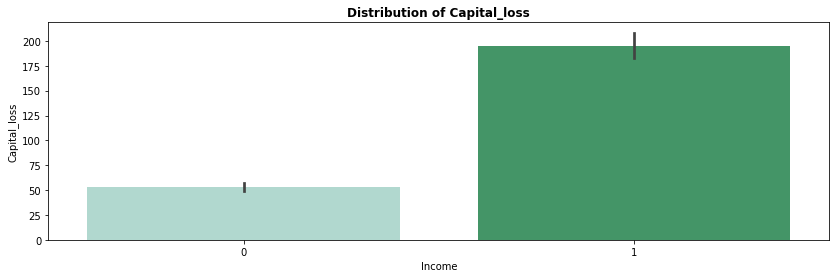

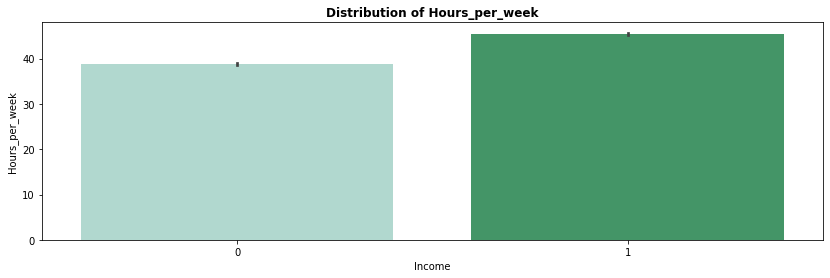

In [ ]:
for fea in num_fea:
    plt.figure(figsize=(14,4))
    plt.subplot(111)
    sns.barplot(y=fea,x='Income',data=df,palette='BuGn')
    plt.title('Distribution of {}'.format(fea),fontweight='bold')

- we find that those who worked for more hours per week have earned more than 50K
- The people whose capital loss and capital gain is more have earned more than 50K
- The people whoever have studied for more years are tend to earn more than 50K 

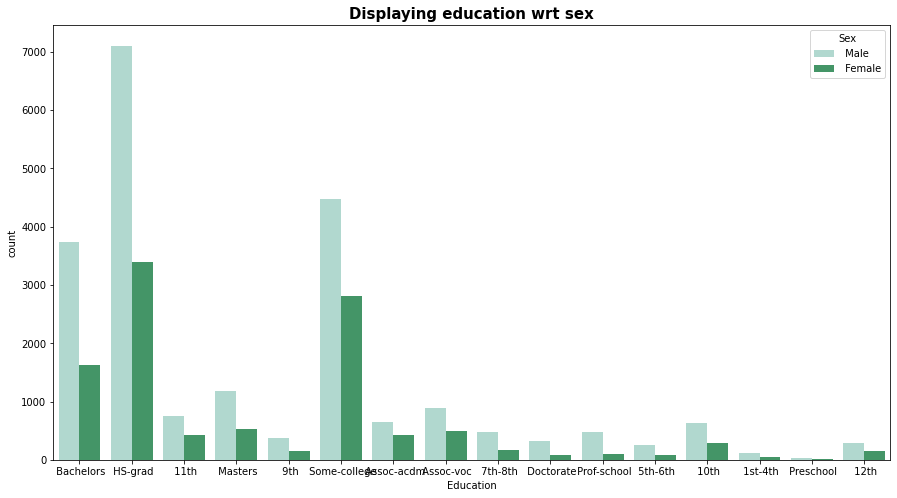

In [ ]:

plt.figure(figsize=(15,8))
ax = sns.countplot(data=df, x='Education', hue='Sex',palette='BuGn')
plt.title("Displaying education wrt sex", weight='bold',fontsize=15)

plt.show()

- We find that most of the male and female people highest education is HS-grad  

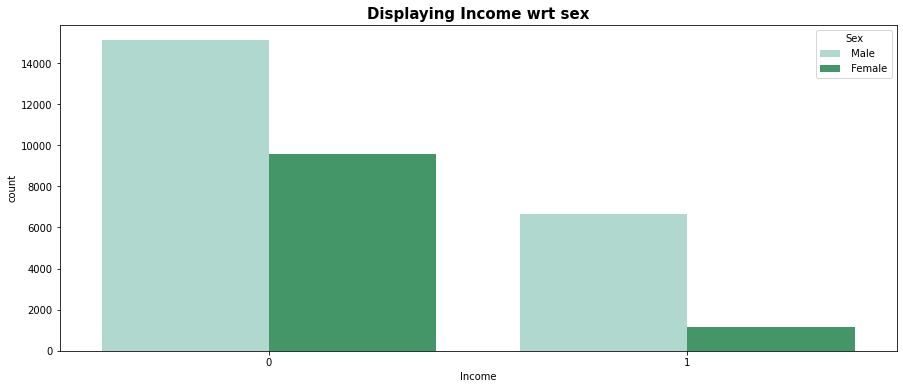

In [ ]:

plt.figure(figsize=(15,6))
ax = sns.countplot(data=df, x='Income', hue='Sex',palette='BuGn')
plt.title("Displaying Income wrt sex", weight='bold',fontsize=15)
plt.show()


- We find that male people earn more than the female people

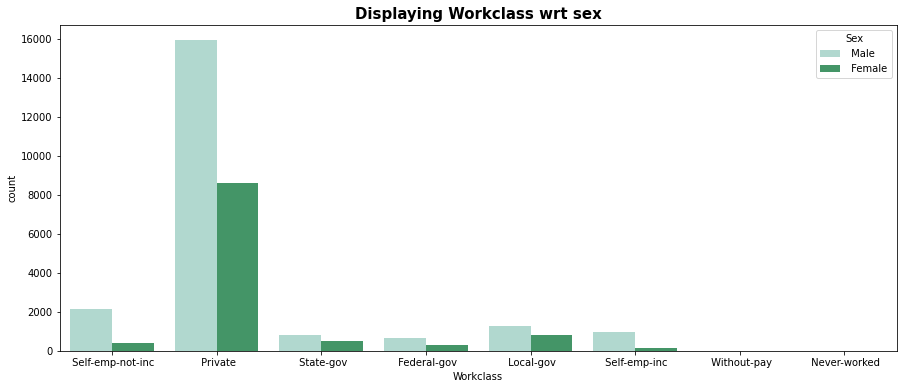

In [ ]:

plt.figure(figsize=(15,6))
ax = sns.countplot(data=df, x='Workclass', hue='Sex',palette='BuGn')
plt.title("Displaying Workclass wrt sex", weight='bold',fontsize=15)
plt.show()

- We find that more male are into private jobs.
- We also find that more female are also into private jobs but not more than male people

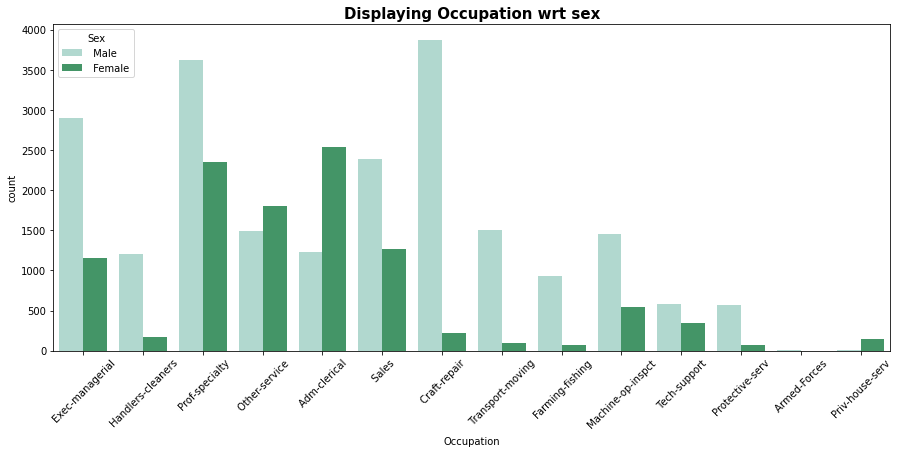

In [ ]:
plt.figure(figsize=(15,6))
ax = sns.countplot(data=df, x='Occupation', hue='Sex',palette='BuGn')
plt.title("Displaying Occupation wrt sex", weight='bold',fontsize=15)
plt.xticks(rotation=45)
plt.show()

- Most of the male are doing craft-repair and prof-speciality
- Most of the female are doing Adm-clerical job


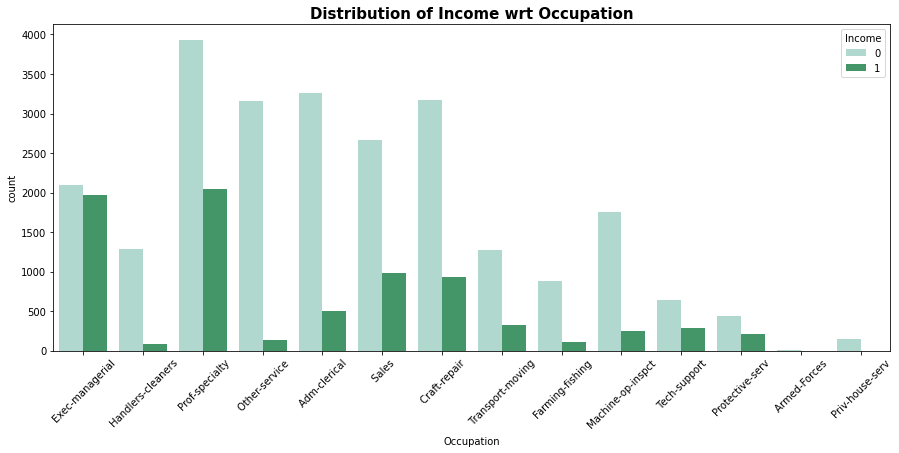

In [ ]:
plt.figure(figsize=(15,6))
ax = sns.countplot(data=df, x='Occupation', hue='Income',palette='BuGn')
plt.title("Distribution of Income wrt Occupation", weight='bold',fontsize=15)
plt.xticks(rotation=45)
plt.show()

- 'Prof-speciality' are highest paid compared to any other occupation.

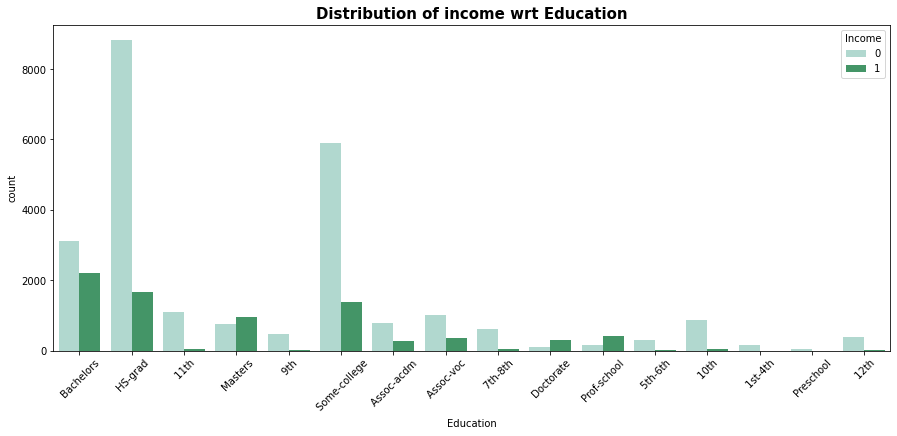

In [ ]:
plt.figure(figsize=(15,6))
ax = sns.countplot(data=df, x='Education', hue='Income',palette='BuGn')
plt.title("Distribution of income wrt Education", weight='bold',fontsize=15)
plt.xticks(rotation=45)
plt.show()

- Persons with education of 'Bachelors' are largest wrt population count to have earning more than 50K.
- Persons with education as "Prof-school" have a higher earning ratio as more than 50K compared to less than 50K.
- Persons with education 'HS-grad' are largest population count to have earning less than 50K.

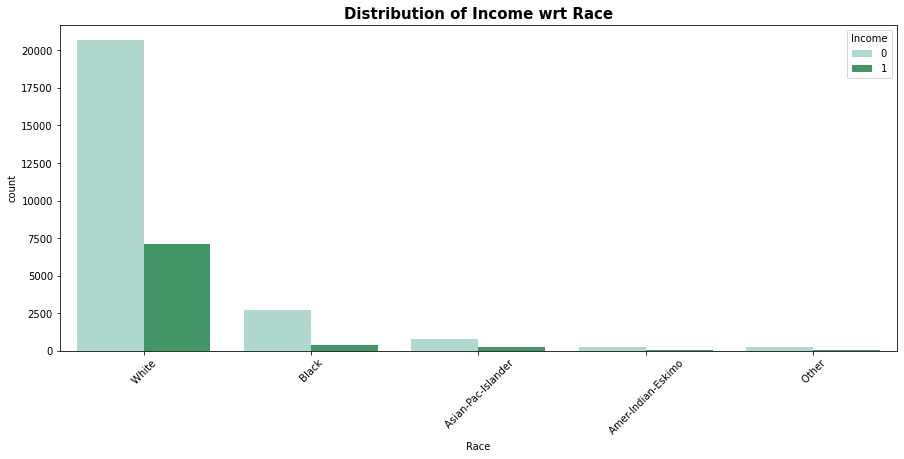

In [ ]:
plt.figure(figsize=(15,6))
ax = sns.countplot(data=df, x='Race', hue='Income',palette='BuGn')
plt.title("Distribution of Income wrt Race", weight='bold',fontsize=15)
plt.xticks(rotation=45)
plt.show()

- White people have a greater ratio of income more than 50K to income less than 50K compared to other races

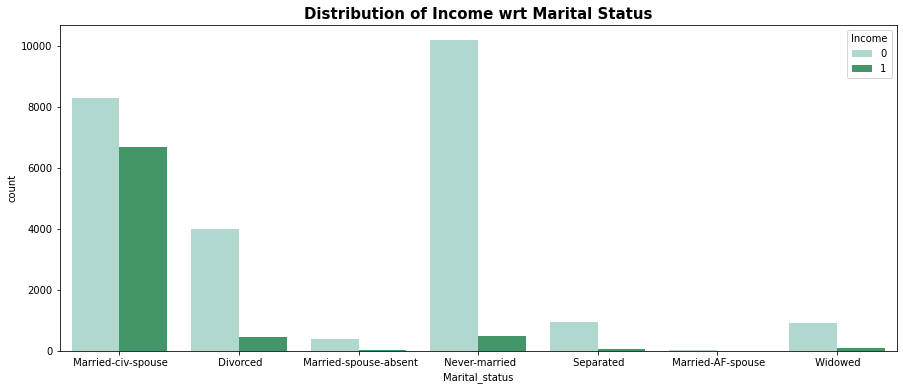

In [ ]:
plt.figure(figsize=(15,6))
ax = sns.countplot(data=df, x='Marital_status', hue='Income',palette='BuGn')
plt.title("Distribution of Income wrt Marital Status", weight='bold',fontsize=15)
plt.show()

- Most of Never married(single) people are earning less than 50K
- Married civ spouse are earning more than 50K when compared to other people

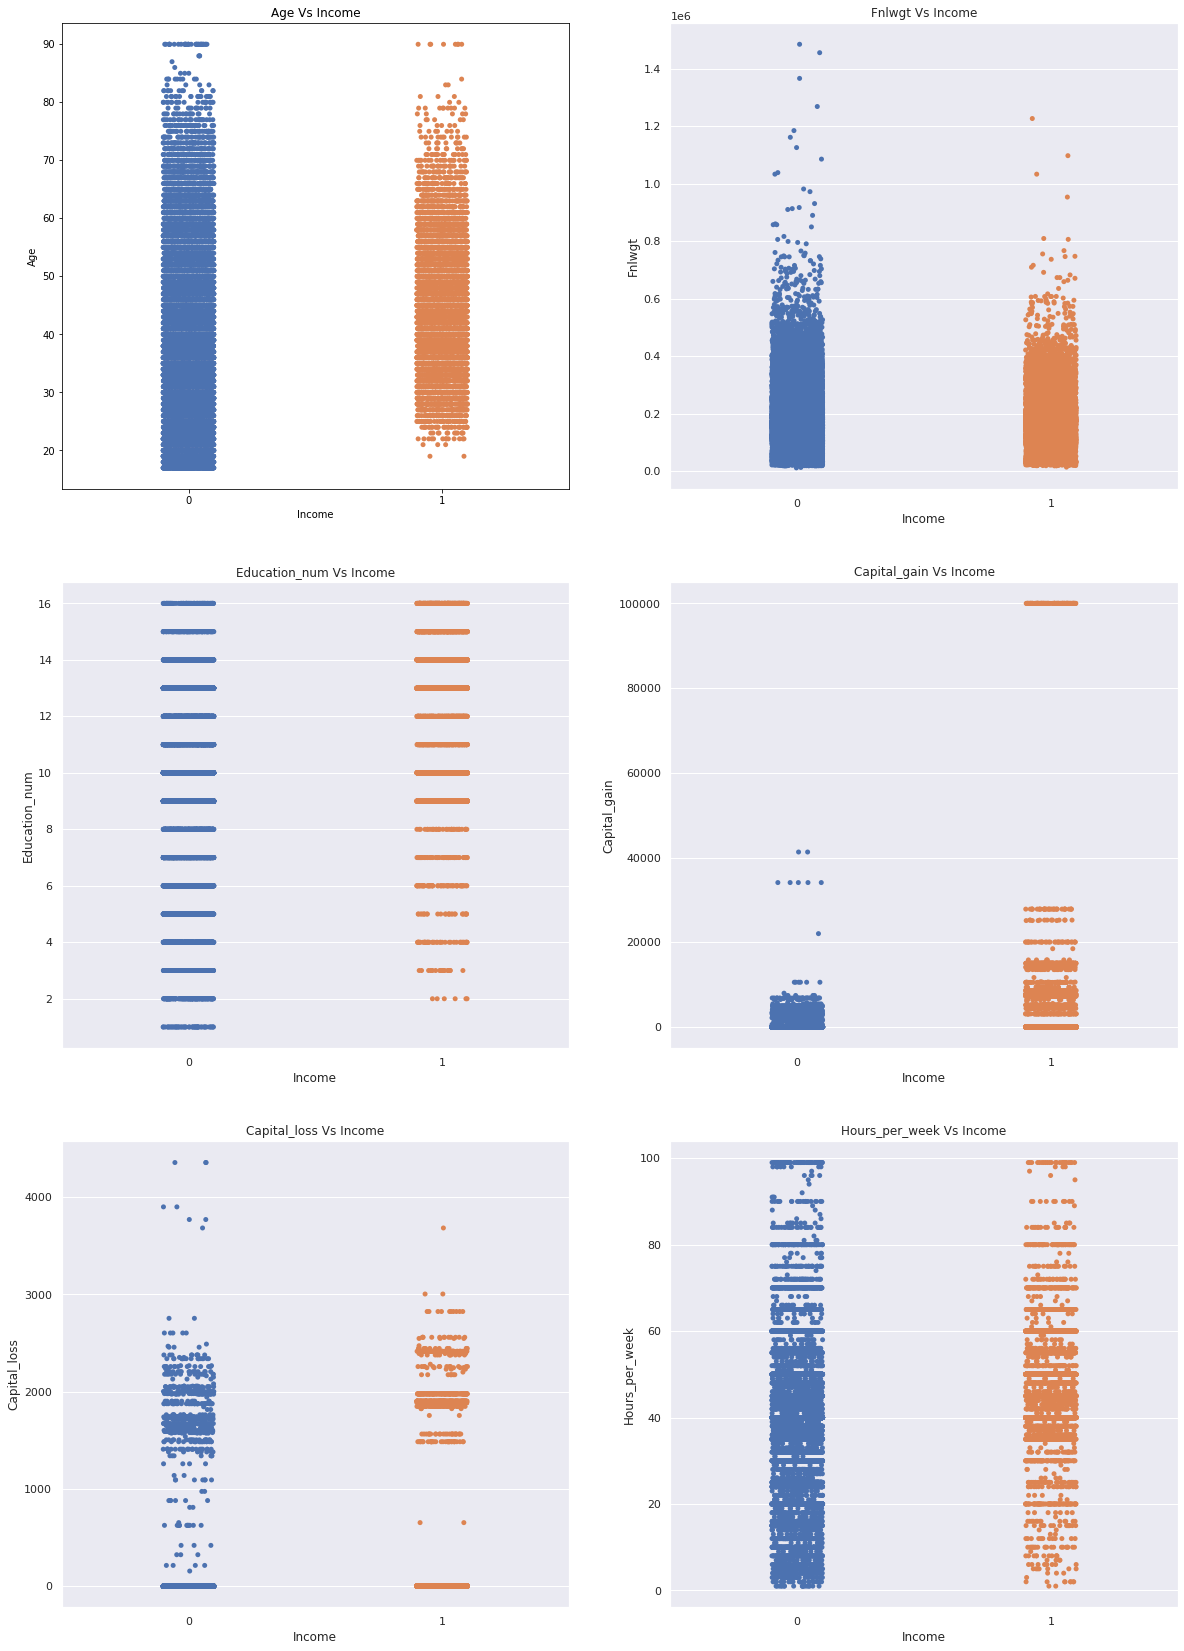

In [ ]:
plt.figure(figsize=(20,60))
for fea in enumerate(num_fea):
    plt.subplot(6, 2, fea[0]+1)
    sns.set(rc={'figure.figsize':(8,8)})
    sns.stripplot(data=df, y=fea[1], x='Income')
    plt.title("{} Vs Income".format(fea[1], fontsize=15, fontweight='bold'))



### Multivariate Analysis

<Figure size 1440x720 with 0 Axes>

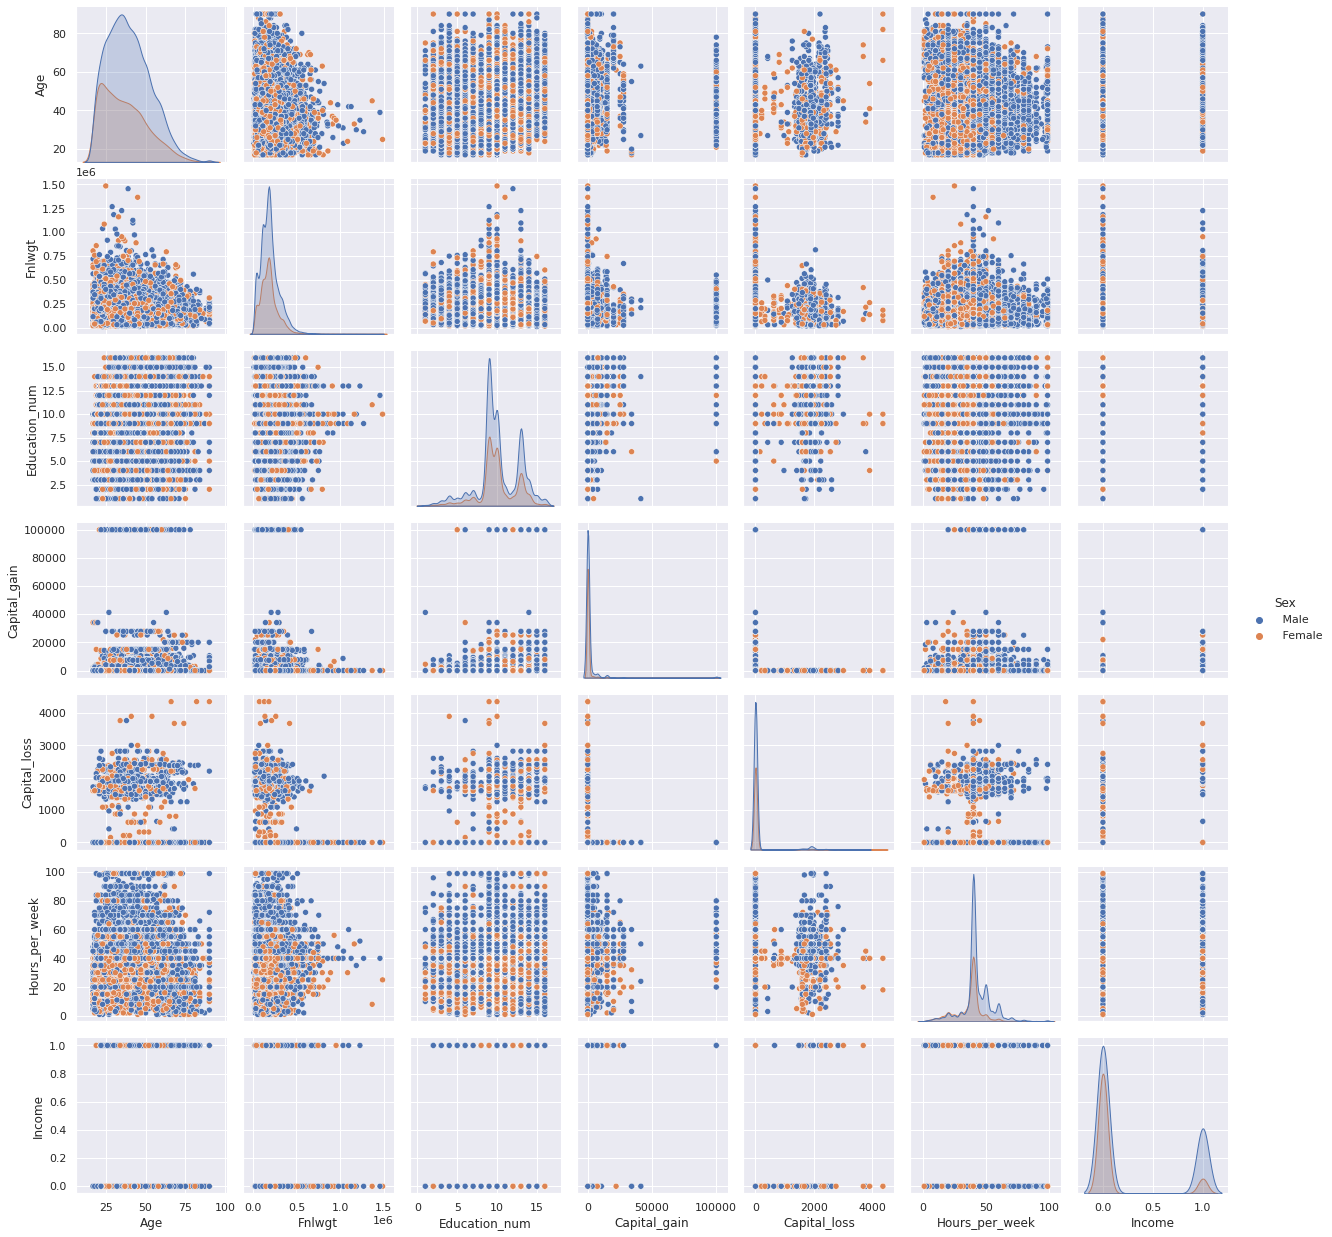

In [ ]:
plt.figure(1,figsize=(20,10))
sns.pairplot(data=df,hue='Sex')

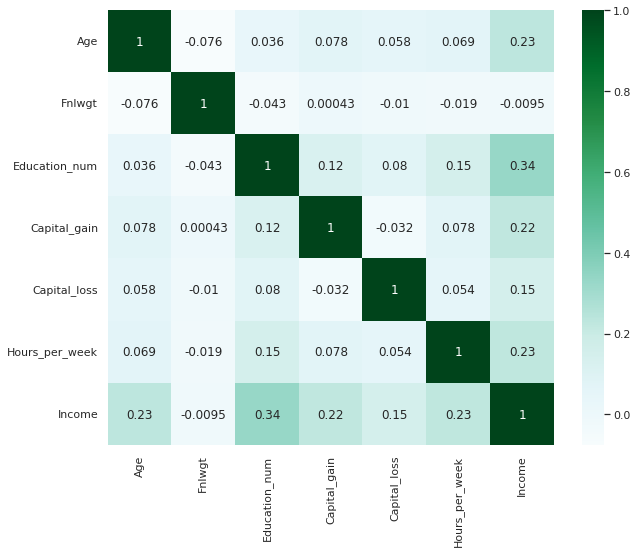

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(10,8))
ax = sns.heatmap(df.corr(), annot=True, cmap='BuGn')

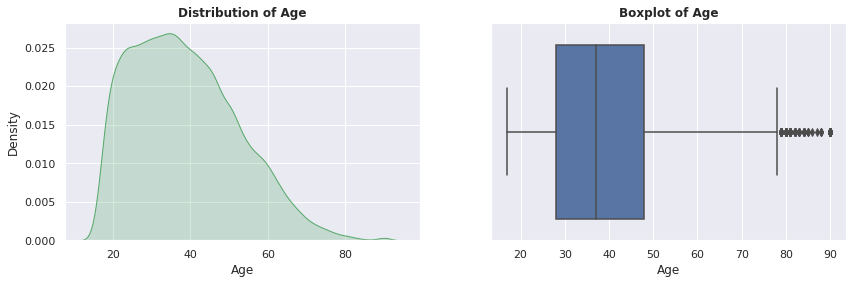

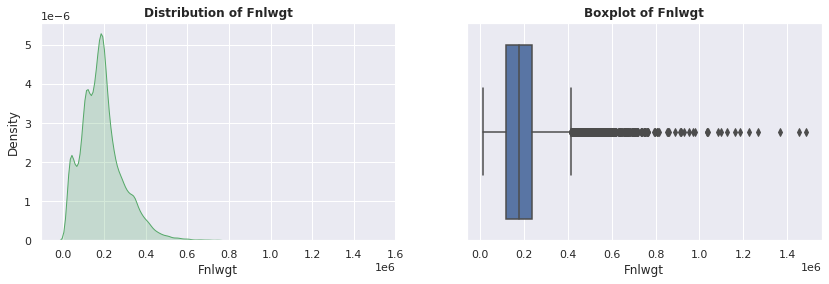

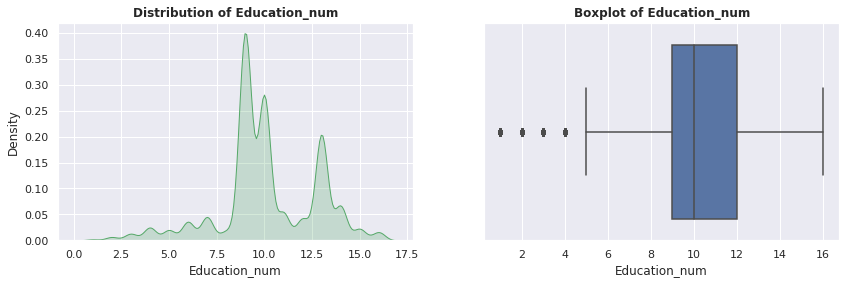

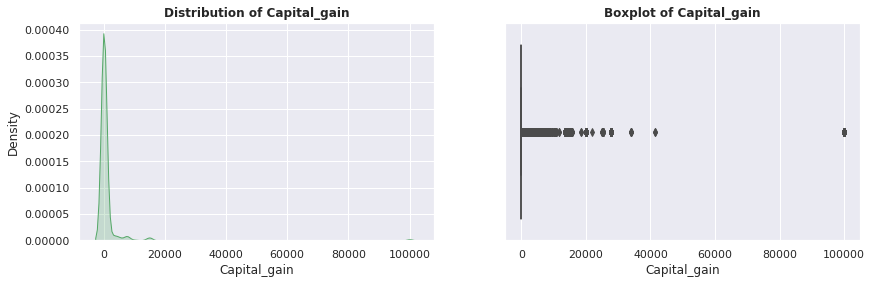

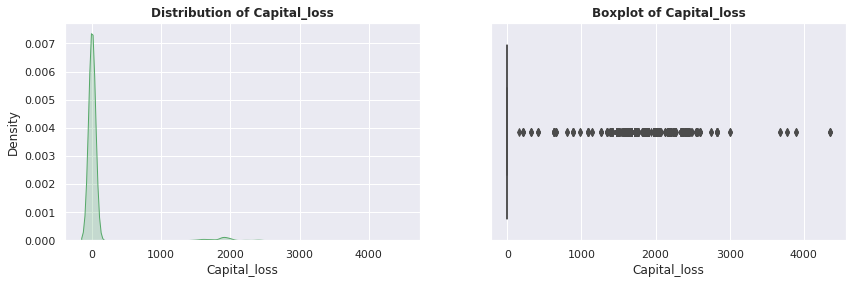

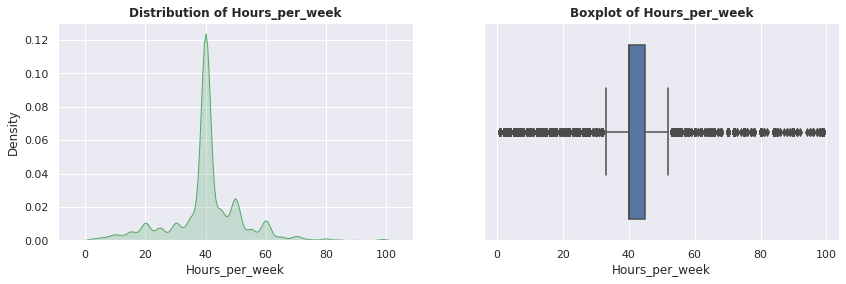

In [ ]:
for fea in num_fea:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.kdeplot(x=df[fea],shade=True,color='g',data=df)
    plt.title('Distribution of {}'.format(fea),fontweight='bold')
    
    plt.subplot(122)
    sns.boxplot(x=fea,data=df[num_fea])
    plt.title('Boxplot of {}'.format(fea),fontweight='bold')
    plt.show()

- We observe that there are outliers in the columns 'Age','Fnlwgt,'Education_num',Hours_per_week'

In [ ]:
df1=df.copy()

#### Imputation of outliers with median values

In [ ]:
#Replacing the outliers by median
for col_name in num_fea[:-1]:
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    df.loc[(df[col_name] < low) | (df[col_name] > high), col_name] = df[col_name].median()

- I have imputed outliers with median because even if variables contain outliers median will not be effected.

In [ ]:
df.shape

(32536, 15)

#### Encoding the data

- Majority of the classification models need input as 'int/float' and do not work on 'string' data, we encode categorical columns using 'Label Encoder'

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
df['Workclass']=le.fit_transform(df['Workclass'])
df['Education']=le.fit_transform(df['Education'])
df['Marital_status']=le.fit_transform(df['Marital_status'])
df['Occupation']=le.fit_transform(df['Occupation'])
df['Relationship']=le.fit_transform(df['Relationship'])
df['Race']=le.fit_transform(df['Race'])
df['Sex']=le.fit_transform(df['Sex'])
df['Native_country']=le.fit_transform(df['Native_country'])


In [ ]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0


- We find that all the categorical columns are converted into numerical columns

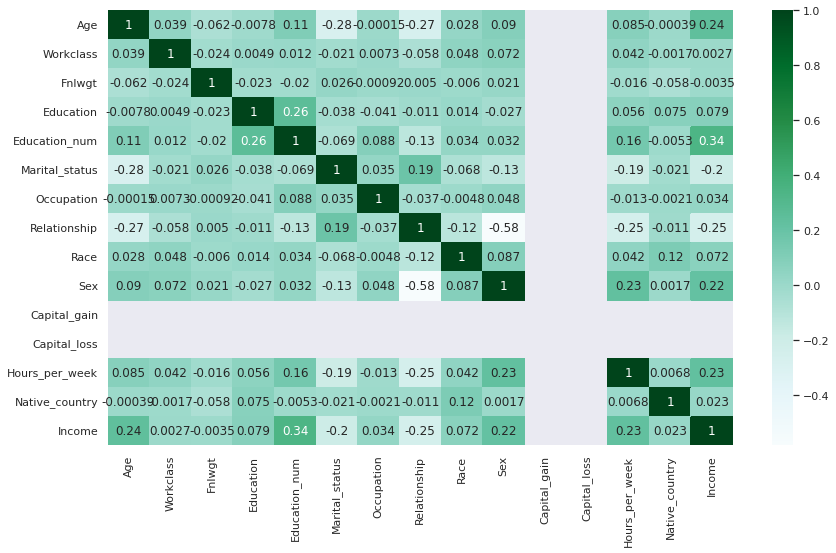

In [ ]:
#Correlation map with all the columns

f, ax = plt.subplots(1, 1, figsize=(14,8))
ax = sns.heatmap(df.corr(), annot=True, cmap='BuGn')

### Feature Importance

- To create best predictive model we need to understand the available data
- It is important to understand the variables and how much they are contributing towards the target variable
- So that we can remove unnecessary variables to improve model performance
- To understand the importance of data we use ML classifiers and plot bar graph to describe importance

In [ ]:
#Splitting the data into x variable and y target variable

x = df.drop(["Income"],axis=1)
y = df["Income"]

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42,test_size=0.20)

In [ ]:
#Classifiers
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV 
from xgboost import plot_importance

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score


Feature importance by Logistic Regression

Feature: 0, Score: -0.00000
Feature: 1, Score: -0.00000
Feature: 2, Score: -0.00001
Feature: 3, Score: -0.00000
Feature: 4, Score: -0.00000
Feature: 5, Score: -0.00000
Feature: 6, Score: -0.00000
Feature: 7, Score: -0.00000
Feature: 8, Score: -0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: -0.00000
Feature: 13, Score: -0.00000


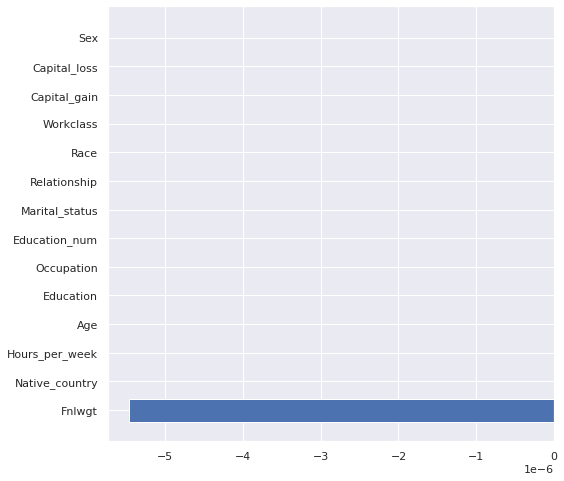

In [ ]:
print("Feature importance by Logistic Regression")
print()
LR=LogisticRegression()
LR.fit(x,y)
features = LR.coef_[0]
indices=np.argsort(features)

#summarize feature importance
for i,v in enumerate(features):
    print('Feature: %0d, Score: %.5f' %(i,v))
    
#plot feature importance
fig,ax=plt.subplots()
ax.barh(range(len(features)),features[indices])
ax.set_yticks(range(len(features)))
_=ax.set_yticklabels(np.array(x_train.columns)[indices])

Feature importance by XGBoost Classifier

Feature: 0, Score: 0.07597
Feature: 1, Score: 0.01502
Feature: 2, Score: 0.00779
Feature: 3, Score: 0.06277
Feature: 4, Score: 0.17480
Feature: 5, Score: 0.14198
Feature: 6, Score: 0.03888
Feature: 7, Score: 0.37870
Feature: 8, Score: 0.00958
Feature: 9, Score: 0.03769
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.04679
Feature: 13, Score: 0.01003


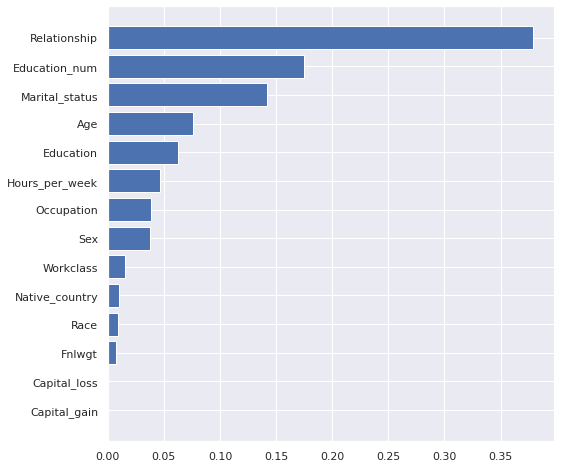

In [ ]:
print("Feature importance by XGBoost Classifier")
print()
XGB= XGBClassifier()
XGB.fit(x,y)
features = XGB.feature_importances_
indices=np.argsort(features)

#summarize feature importance
for i,v in enumerate(features):
    print('Feature: %0d, Score: %.5f' %(i,v))
    
#plot feature importance
fig,ax=plt.subplots()
ax.barh(range(len(features)),features[indices])
ax.set_yticks(range(len(features)))
_=ax.set_yticklabels(np.array(x_train.columns)[indices])

Feature importance by Decision Tree

Feature: 0, Score: 0.14435
Feature: 1, Score: 0.04386
Feature: 2, Score: 0.25477
Feature: 3, Score: 0.02736
Feature: 4, Score: 0.11847
Feature: 5, Score: 0.00848
Feature: 6, Score: 0.06836
Feature: 7, Score: 0.20687
Feature: 8, Score: 0.01819
Feature: 9, Score: 0.00469
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.08935
Feature: 13, Score: 0.01525


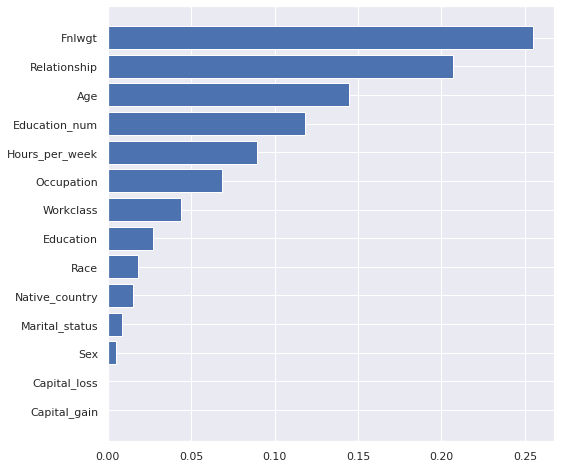

In [ ]:
print("Feature importance by Decision Tree")
print()
DT = DecisionTreeClassifier()
DT.fit(x,y)
features = DT.feature_importances_
indices=np.argsort(features)

#summarize feature importance
for i,v in enumerate(features):
    print('Feature: %0d, Score: %.5f' %(i,v))
    
#plot feature importance
fig,ax=plt.subplots()
ax.barh(range(len(features)),features[indices])
ax.set_yticks(range(len(features)))
_=ax.set_yticklabels(np.array(x_train.columns)[indices])

Feature importance by Random Forest

Feature: 0, Score: 0.18335
Feature: 1, Score: 0.04403
Feature: 2, Score: 0.21517
Feature: 3, Score: 0.04168
Feature: 4, Score: 0.10540
Feature: 5, Score: 0.06435
Feature: 6, Score: 0.07766
Feature: 7, Score: 0.12056
Feature: 8, Score: 0.01651
Feature: 9, Score: 0.01451
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.09969
Feature: 13, Score: 0.01708


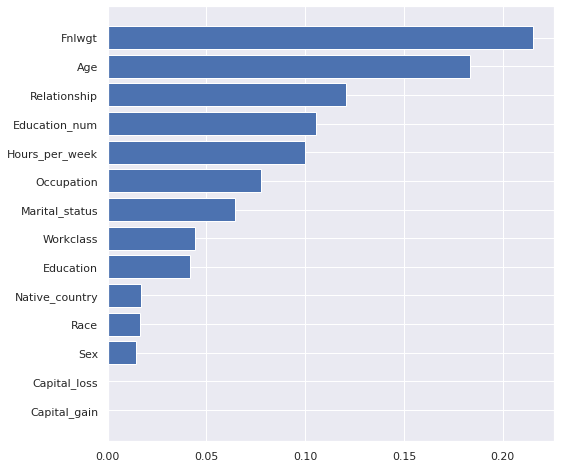

In [ ]:
print("Feature importance by Random Forest")
print()
RF = RandomForestClassifier()
RF.fit(x,y)
features = RF.feature_importances_
indices=np.argsort(features)

#summarize feature importance
for i,v in enumerate(features):
    print('Feature: %0d, Score: %.5f' %(i,v))
    
#plot feature importance
fig,ax=plt.subplots()
ax.barh(range(len(features)),features[indices])
ax.set_yticks(range(len(features)))
_=ax.set_yticklabels(np.array(x_train.columns)[indices])

- From the analysis, we find that the most important features are fnlwgt,age,relationship,educationnum,hoursperweek
- Least important features are native country,race,sex,education
- So,let's build the models by dropping the least important columns and by not dropping 

## Building the models 

### Standardising the data

- Now we need to bring the data to a common scale since there are columns with very small and high values in the same column
- We use standard scaler for this process. It makes mean=0 and scales the data to unit variance

In [ ]:
from sklearn.preprocessing import StandardScaler 
scaler=StandardScaler()
x_scaler=scaler.fit_transform(x)

In [ ]:
xs_train, xs_test, ys_train, ys_test = train_test_split(x_scaler,y, random_state=42,test_size=0.20)

In [ ]:
lr = LogisticRegression()
lr.fit(xs_train,ys_train)
ys_pred = lr.predict(xs_test)
print(classification_report(ys_pred,ys_test))
print("Logistic Regression:")
print('Accuracy score:',accuracy_score(ys_pred,ys_test))
print('Cross-Val score:',cross_val_score(lr,x_scaler,y,cv=5))

              precision    recall  f1-score   support

           0       0.94      0.83      0.88      5599
           1       0.38      0.65      0.48       909

    accuracy                           0.80      6508
   macro avg       0.66      0.74      0.68      6508
weighted avg       0.86      0.80      0.82      6508

Logistic Regression:
Accuracy score: 0.8048555623847572
Cross-Val score: [0.79917025 0.80405717 0.80759182 0.80497925 0.80513293]


In [ ]:
knn = KNeighborsClassifier(leaf_size=1,p=2,n_neighbors=20)
knn.fit(xs_train,ys_train)
ys_pred = knn.predict(xs_test)
print(classification_report(ys_pred,ys_test))
print("KNeighborsClassifier:")
print('Accuracy score:',accuracy_score(ys_pred,ys_test))
print('Cross-Val score:',cross_val_score(knn,x_scaler,y,cv=5))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89      5280
           1       0.53      0.66      0.59      1228

    accuracy                           0.82      6508
   macro avg       0.72      0.76      0.74      6508
weighted avg       0.84      0.82      0.83      6508

KNeighborsClassifier:
Accuracy score: 0.8240626920712969
Cross-Val score: [0.81883835 0.82234517 0.82480406 0.83341017 0.82587982]


In [ ]:
dt = DecisionTreeClassifier()
dt.fit(xs_train,ys_train)
ys_pred = dt.predict(xs_test)
print(classification_report(ys_pred,ys_test))
print("DecisionTreeClassifier:")
print('Accuracy score:',accuracy_score(ys_pred,ys_test))
print('Cross-Val score:',cross_val_score(dt,x_scaler,y,cv=5))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      4847
           1       0.56      0.52      0.54      1661

    accuracy                           0.77      6508
   macro avg       0.70      0.69      0.69      6508
weighted avg       0.77      0.77      0.77      6508

DecisionTreeClassifier:
Accuracy score: 0.7719729563614014
Cross-Val score: [0.77781192 0.77224527 0.77178423 0.77885354 0.77255264]


In [ ]:
rf = RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=1000,max_depth=70,bootstrap=True)
rf.fit(xs_train,ys_train)
y_pred = rf.predict(xs_test)
print(classification_report(ys_pred,ys_test))
print("RandomForestClassifier:")
print('Accuracy score:',accuracy_score(ys_pred,ys_test))


              precision    recall  f1-score   support

           0       0.84      0.86      0.85      4847
           1       0.56      0.52      0.54      1661

    accuracy                           0.77      6508
   macro avg       0.70      0.69      0.69      6508
weighted avg       0.77      0.77      0.77      6508

RandomForestClassifier:
Accuracy score: 0.7719729563614014


In [ ]:
ab = AdaBoostClassifier()
ab.fit(xs_train,ys_train)
ys_pred = ab.predict(xs_test)
print(classification_report(ys_pred,ys_test))
print("AdaBoostClassifier:")
print('Accuracy score:',accuracy_score(ys_pred,ys_test))
print('Cross-Val score:',cross_val_score(ab,x_scaler,y,cv=5))


              precision    recall  f1-score   support

           0       0.92      0.87      0.90      5253
           1       0.57      0.70      0.62      1255

    accuracy                           0.84      6508
   macro avg       0.74      0.78      0.76      6508
weighted avg       0.85      0.84      0.84      6508

AdaBoostClassifier:
Accuracy score: 0.8383527965580824
Cross-Val score: [0.83312846 0.82818503 0.83525434 0.84693407 0.83786691]


In [102]:
Gb = GradientBoostingClassifier()
Gb.fit(xs_train,ys_train)
ys_pred = Gb.predict(xs_test)
print(classification_report(ys_pred,ys_test))
print("GradientBoostingClassifier:")
print('Accuracy score:',accuracy_score(ys_pred,ys_test))
print('Cross-Val score:',cross_val_score(Gb,x_scaler,y,cv=5))



              precision    recall  f1-score   support

           0       0.93      0.87      0.90      5264
           1       0.57      0.71      0.63      1244

    accuracy                           0.84      6508
   macro avg       0.75      0.79      0.77      6508
weighted avg       0.86      0.84      0.85      6508

GradientBoostingClassifier:
Accuracy score: 0.8431161647203442
Cross-Val score: [0.83558697 0.83540802 0.84124789 0.84923928 0.8435531 ]


In [ ]:
SVM = SVC(kernel="linear")
SVM.fit(xs_train,ys_train)
ys_pred = SVM.predict(xs_test)
print(classification_report(ys_pred,ys_test))
print("SVM:")
print('Accuracy score:',accuracy_score(ys_pred,ys_test))
print('Cross-Val score:',cross_val_score(SVM,x_scaler,y,cv=5))




              precision    recall  f1-score   support

           0       0.95      0.82      0.88      5706
           1       0.35      0.68      0.47       802

    accuracy                           0.81      6508
   macro avg       0.65      0.75      0.67      6508
weighted avg       0.88      0.81      0.83      6508

SVM:
Accuracy score: 0.8074677320221266
Cross-Val score: [0.80301168 0.80713078 0.80866759 0.80713078 0.80559398]


In [ ]:
XGB = XGBClassifier()
XGB.fit(xs_train,ys_train)
y_pred = XGB.predict(xs_test)
print(classification_report(ys_pred,ys_test))
print("XGBoost:")
print('Accuracy score:',accuracy_score(ys_pred,ys_test))
print('Cross-Val score:',cross_val_score(XGB,x_scaler,y,cv=5))


              precision    recall  f1-score   support

           0       0.95      0.82      0.88      5706
           1       0.35      0.68      0.47       802

    accuracy                           0.81      6508
   macro avg       0.65      0.75      0.67      6508
weighted avg       0.88      0.81      0.83      6508

XGBoost:
Accuracy score: 0.8074677320221266
Cross-Val score: [0.83374309 0.83725219 0.83986476 0.84724143 0.8435531 ]


- By scaling the data and building the models, we find that the accuracy is highest for the Gradient Boost classifier i.e.,84.3%
- Next best suitable model after GB classifier is the Ada Boost classifier i.e.,83.8%
- Cross-Validation is primarily used to test the ability of a machine learning model to predict new data  
- The cross-validation is a procedure used to avoid overfitting and estimate the skill of the model on new data.

** Now Building the models by dropping the features *which*
are less important and keeping the features as per importance analysis ** 

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix ,f1_score
from sklearn.metrics import classification_report, roc_auc_score, recall_score, precision_score,roc_curve
from sklearn import metrics

In [ ]:
X = df.drop(["Income","Sex","Race","Education","Native_country"],axis=1)
y = df["Income"]
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=0)


**************************************************LOGISTIC REGRESSION **************************************************
              precision    recall  f1-score   support

           0       1.00      0.76      0.86      8134
           1       0.00      0.00      0.00         0

    accuracy                           0.76      8134
   macro avg       0.50      0.38      0.43      8134
weighted avg       1.00      0.76      0.86      8134

confusion matrix 
 [[6191    0]
 [1943    0]]
Logistic Regression: 0.7611261372018687


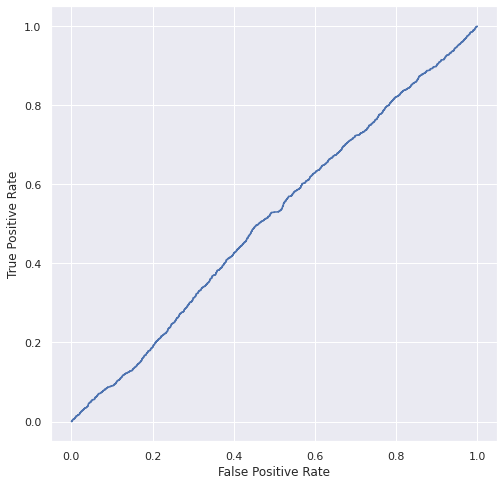

In [ ]:
print('*'*50+'LOGISTIC REGRESSION '+'*'*50)

Lr = LogisticRegression()
Lr.fit(X_train,y_train)
y_pred = Lr.predict(X_test)
print(classification_report(y_pred,y_test))
cm = confusion_matrix(y_test , y_pred )
print('confusion matrix \n',  cm)
print("Logistic Regression:",accuracy_score(y_pred,y_test))

y_pred_proba=Lr.predict_proba(X_test)[::,1]
fpr,tpr,_=metrics.roc_curve(y_test,y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**************************************************K NEIGHBORS CLASSIFIER**************************************************
              precision    recall  f1-score   support

           0       0.99      0.76      0.86      8010
           1       0.03      0.48      0.06       124

    accuracy                           0.76      8134
   macro avg       0.51      0.62      0.46      8134
weighted avg       0.97      0.76      0.85      8134

confusion matrix 
 [[6126   65]
 [1884   59]]
KNeighborsClassifier: 0.7603884927464962


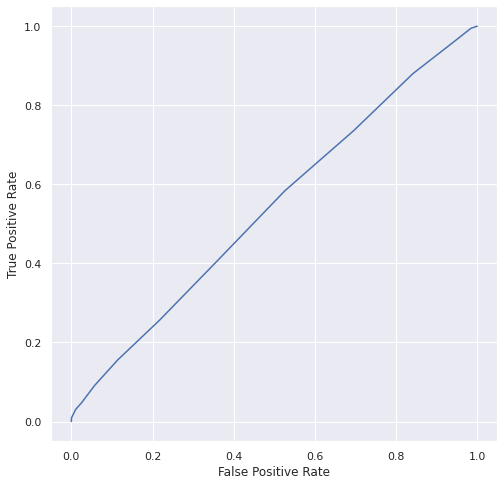

In [ ]:

print('*'*50+'K NEIGHBORS CLASSIFIER'+"*"*50)
knn = KNeighborsClassifier(leaf_size=1,p=2,n_neighbors=20)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_pred,y_test))
cm = confusion_matrix(y_test , y_pred )
print('confusion matrix \n',  cm)
print("KNeighborsClassifier:",accuracy_score(y_pred,y_test))

y_pred_proba=knn.predict_proba(X_test)[::,1]
fpr,tpr,_=metrics.roc_curve(y_test,y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**************************************************DECISION TREE CLASSIFIER**************************************************
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      6087
           1       0.53      0.50      0.52      2047

    accuracy                           0.76      8134
   macro avg       0.68      0.68      0.68      8134
weighted avg       0.76      0.76      0.76      8134

confusion matrix 
 [[5174 1017]
 [ 913 1030]]
DecisionTreeClassifier: 0.7627243668551758


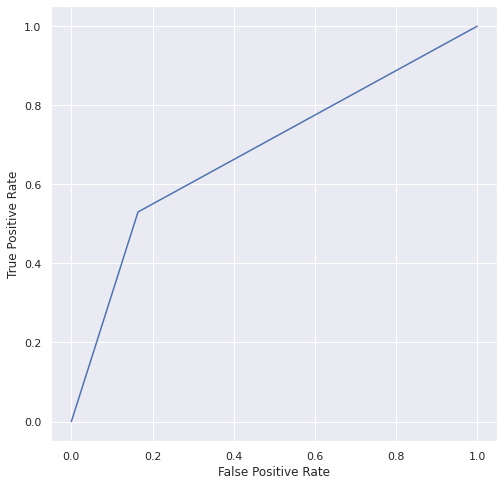

In [ ]:
print('*'*50+'DECISION TREE CLASSIFIER'+"*"*50)
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print(classification_report(y_pred,y_test))
cm = confusion_matrix(y_test , y_pred )
print('confusion matrix \n',  cm)
print("DecisionTreeClassifier:",accuracy_score(y_pred,y_test))
      
y_pred_proba=dt.predict_proba(X_test)[::,1]
fpr,tpr,_=metrics.roc_curve(y_test,y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**************************************************RANDOM FOREST CLASSIFIER **************************************************
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      6421
           1       0.58      0.66      0.62      1713

    accuracy                           0.83      8134
   macro avg       0.74      0.77      0.75      8134
weighted avg       0.84      0.83      0.83      8134

confusion matrix 
 [[5611  580]
 [ 810 1133]]
RandomForestClassifier: 0.8291123678387018


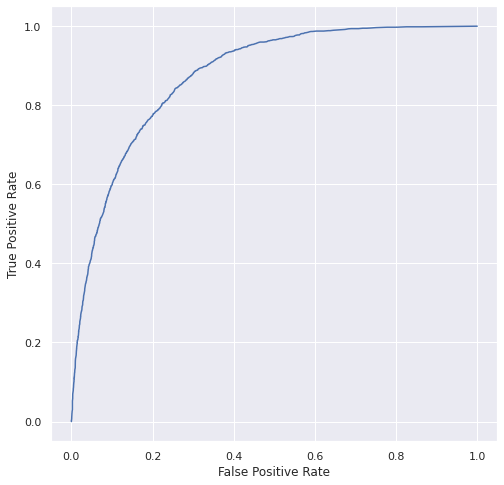

In [ ]:
print('*'*50+'RANDOM FOREST CLASSIFIER '+"*"*50)
rf = RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=1000,max_depth=70)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_pred,y_test))
cm = confusion_matrix(y_test , y_pred )
print('confusion matrix \n',  cm)
print("RandomForestClassifier:",accuracy_score(y_pred,y_test))

y_pred_proba=rf.predict_proba(X_test)[::,1]
fpr,tpr,_=metrics.roc_curve(y_test,y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**************************************************ADA BOOST CLASSIFIER **************************************************
              precision    recall  f1-score   support

           0       0.92      0.87      0.90      6573
           1       0.56      0.70      0.62      1561

    accuracy                           0.84      8134
   macro avg       0.74      0.79      0.76      8134
weighted avg       0.86      0.84      0.84      8134

confusion matrix 
 [[5725  466]
 [ 848 1095]]
AdaBoostClassifier: 0.8384558642734202


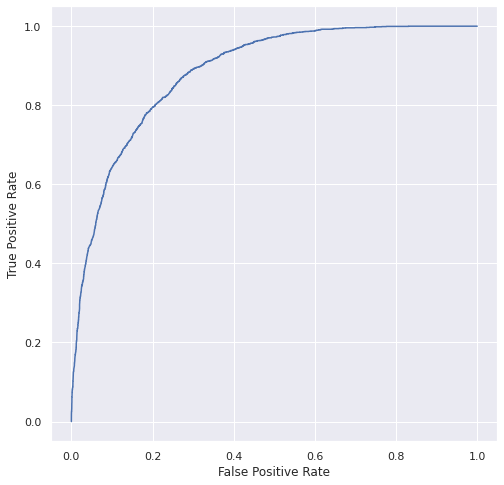

In [ ]:
print('*'*50+'ADA BOOST CLASSIFIER '+"*"*50)
ab = AdaBoostClassifier()
ab.fit(X_train,y_train)
y_pred = ab.predict(X_test)
print(classification_report(y_pred,y_test))
cm = confusion_matrix(y_test , y_pred )
print('confusion matrix \n',  cm)
print("AdaBoostClassifier:",accuracy_score(y_pred,y_test))

y_pred_proba=ab.predict_proba(X_test)[::,1]
fpr,tpr,_=metrics.roc_curve(y_test,y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**************************************************GRADIENT BOOSTING**************************************************
              precision    recall  f1-score   support

           0       0.93      0.87      0.90      6587
           1       0.57      0.71      0.63      1547

    accuracy                           0.84      8134
   macro avg       0.75      0.79      0.77      8134
weighted avg       0.86      0.84      0.85      8134

confusion matrix 
 [[5749  442]
 [ 838 1105]]
GradientBoostingClassifier: 0.842635849520531


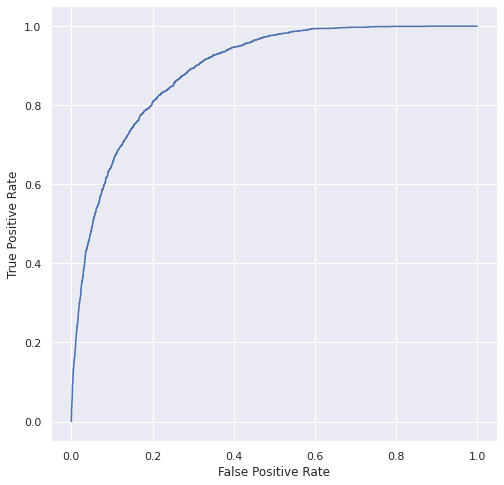

In [ ]:
print('*'*50+'GRADIENT BOOSTING'+'*'*50)
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)
print(classification_report(y_pred,y_test))
cm = confusion_matrix(y_test , y_pred )
print('confusion matrix \n',  cm)
print("GradientBoostingClassifier:",accuracy_score(y_pred,y_test))

y_pred_proba=gb.predict_proba(X_test)[::,1]
fpr,tpr,_=metrics.roc_curve(y_test,y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**************************************************XGB**************************************************
              precision    recall  f1-score   support

           0       0.93      0.87      0.90      6621
           1       0.56      0.72      0.63      1513

    accuracy                           0.84      8134
   macro avg       0.74      0.79      0.76      8134
weighted avg       0.86      0.84      0.85      8134

confusion matrix 
 [[5762  429]
 [ 859 1084]]
XGBoost: 0.8416523235800344


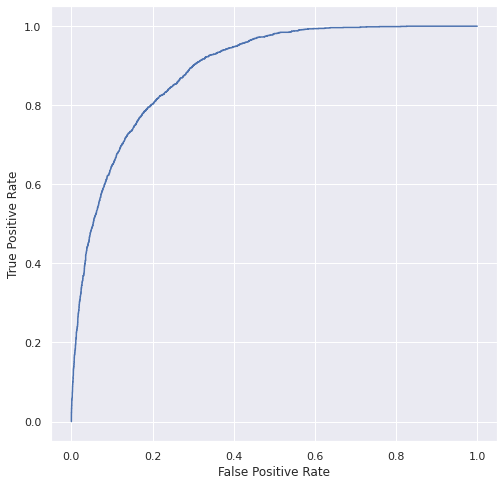

In [ ]:
print('*'*50+'XGB'+'*'*50)
XGB = XGBClassifier()
XGB.fit(X_train,y_train)
y_pred = XGB.predict(X_test)
print(classification_report(y_pred,y_test))
cm = confusion_matrix(y_test , y_pred )
print('confusion matrix \n',  cm)
print("XGBoost:",accuracy_score(y_pred,y_test))

y_pred_proba=XGB.predict_proba(X_test)[::,1]
fpr,tpr,_=metrics.roc_curve(y_test,y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



After dropping the less important features and building the model, we find that the accuracy is highest for the Gradient Boost classifier model i.e., 84.26%


After dropping the features, when models were built, Logistic regression model and Kneighbor classifiers models were not performing well. So, those models were not fitted for this dataset.

# Hyper Parameter Tuning

In [91]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [93]:
X = df.drop(["Income"],axis=1)
y = df.Income

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [97]:
#Hyperparameters tuning for Logistic regression

LR_T=LogisticRegression()
#define parameters
solvers=['newton-cg','lbfgs','liblinear']
penalty=['l1','l2']
c_values=[100,10,1.0,0.1,0.01]

#define grid search
grid=dict(solver=solvers,penalty=penalty,C=c_values)
cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
grid_search=GridSearchCV(estimator=LR_T,param_grid=grid,n_jobs=-1,cv=cv)
grid_result=grid_search.fit(X,y)
grid_result.best_params_



{'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}

In [98]:
LR_tuned= LogisticRegression(C=1.0,penalty='l2',solver='newton-cg')
LR_tuned.fit(X_train, y_train)
y_pred = LR_tuned.predict(X_test)
print(classification_report(y_pred,y_test))
print("Logistic Regression:",accuracy_score(y_pred,y_test))


              precision    recall  f1-score   support

           0       0.93      0.83      0.88      5542
           1       0.39      0.63      0.49       966

    accuracy                           0.80      6508
   macro avg       0.66      0.73      0.68      6508
weighted avg       0.85      0.80      0.82      6508

Logistic Regression: 0.8011677934849416


- After performing tuning on Logistic regression, we find that accuracy has slightly increased but not much.

- By removing less important features, we got highest accuracy score GBoost classifier i.e.,84.26% , without removing also, we got highest for GBoost classifier only i.e.,84.31%

- So, the best fit model for predicting if the person makes more than $50K per year or not is Gradient Boost Classifier.


# SAVING THE MODEL

In [103]:
import pickle
filename = 'censusincome.pkl'
pickle.dump(Gb, open(filename, 'wb'))

In [104]:
model=pickle.load(open('censusincome.pkl','rb'))
result=model.score(xs_test,ys_test)
print(result*100)

84.31161647203442


In [107]:
#creating a dataframe with actual and predicted values

predicted_values=pd.DataFrame([model.predict(xs_test)[:],y_pred[:]],index=['Predicted','Original'])

In [108]:
predicted_values

,0,1,2,3,4,5,6,7,8,9,...,6498,6499,6500,6501,6502,6503,6504,6505,6506,6507
Predicted,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1
Original,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
